In [23]:
#from load_clean_data import load_data
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# reading in the data:
df_data = pd.read_csv("C:/Users/20223319/OneDrive - TU Eindhoven/Bestanden/Jaar 2/Q4/Advanced Programming/Group Assignment/tested_molecules_with_descriptors.csv")
df_descriptors = df_data.copy().drop(labels=['SMILES','PKM2_inhibition','ERK2_inhibition'],axis='columns')

df_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,58,...,0,0,0,0,0,0,0,0,0,0
1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,88,...,0,0,0,0,0,0,0,0,0,0
2,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,84,...,0,0,0,0,0,0,0,0,0,0
3,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,88,...,0,0,0,0,0,0,0,0,0,0
4,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,80,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,12.955843,12.955843,0.016627,-0.290408,0.764433,17.703704,362.385,344.241,362.126657,136,...,0,0,0,0,0,0,0,0,0,0
1112,12.983770,12.983770,0.009487,-3.772852,0.594812,11.720000,374.442,361.338,374.042773,126,...,0,1,0,0,0,1,0,0,0,0
1113,10.579691,10.579691,0.249681,0.249681,0.753119,15.640000,355.849,335.689,355.132015,128,...,0,0,0,0,0,0,0,0,0,0
1114,4.812249,4.812249,0.983396,0.983396,0.738254,14.956522,322.437,304.293,322.125218,116,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# scaling the data:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_descriptors)

headers = df_descriptors.columns
df_scaled = pd.DataFrame(data= x_scaled, columns = headers)

# removing duplicate columns:
df_scaled = df_scaled.T.drop_duplicates().T
df_scaled

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.173157,0.109446,0.876574,0.496613,0.007585,0.000000,0.000000,0.000000,0.034091,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.681565,0.204286,0.815229,0.772003,0.022242,0.225398,0.235340,0.224300,0.204545,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.668845,0.044791,0.855130,0.480694,0.000000,0.133878,0.120774,0.133852,0.181818,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.737621,0.069321,0.803771,0.281161,0.021310,0.183625,0.188389,0.183601,0.204545,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.720575,0.010935,0.798684,0.679244,0.013730,0.170995,0.177362,0.169924,0.159091,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.828885,0.014849,0.824834,0.742095,0.136833,0.478422,0.487954,0.478369,0.477273,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1112,0.831282,0.008368,0.386694,0.500296,0.042036,0.505733,0.529226,0.505379,0.420455,0.0,...,0.000000,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0
1113,0.624996,0.226412,0.892785,0.725966,0.104139,0.463618,0.467310,0.462514,0.431818,0.0,...,0.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1114,0.130113,0.892467,0.985097,0.704776,0.093311,0.387935,0.391522,0.387697,0.363636,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0


The number of principal components needed to achieve a variance of 0.75
              is equal to: 20


Text(0, 0.5, 'Explained Variance (%)')

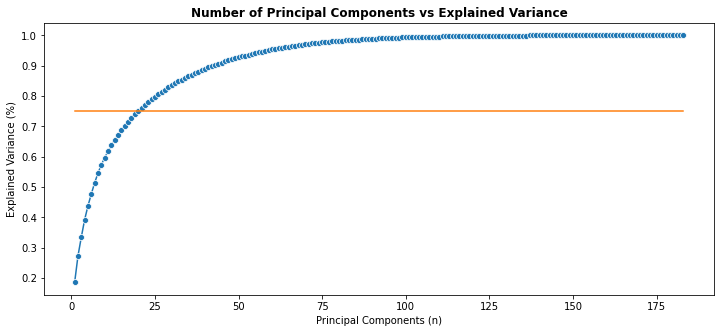

In [25]:
import sklearn.decomposition

# set-up
attributes = df_scaled.columns
attribute_numbers = list(range(1,len(attributes)+1))
n_and_explained_variance = {}
min_explained_variance = 0.75

# calculating cumulitive explained variances
explained_variances = []
for n_principal_components in attribute_numbers:
    pca = sklearn.decomposition.PCA(n_principal_components)
    pca.fit_transform(df_scaled)
    explained_variance = sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)
    n_and_explained_variance[n_principal_components] = explained_variance

# finding numer of principal components for given threshold: 
for component, variance in n_and_explained_variance.items():
    if variance >= min_explained_variance:
        print("""The number of principal components needed to achieve a variance of {}
              is equal to: {}""".format(min_explained_variance,component))
        break

# plotting the results:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(ax=ax, x=attribute_numbers, y=explained_variances, marker='o')
sns.lineplot(ax=ax, x=attribute_numbers, y = [min_explained_variance]*len(attribute_numbers))

ax.set_title("Number of Principal Components vs Explained Variance",weight="bold")
ax.set_xlabel("Principal Components (n)")
ax.set_ylabel("Explained Variance (%)")

#hi


Text(0.5, 1.0, 'PCA Loadings')

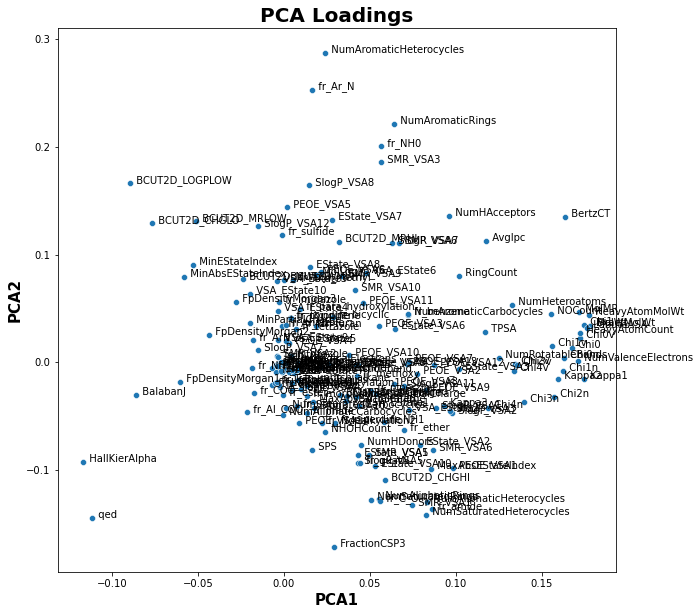

In [26]:
# creating PCA DataFrame:
n = 20
pca_numbers = list(range(1,n+1))
pca = sklearn.decomposition.PCA(n)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data= df_pca, columns=["PCA{}".format(pca) for pca in pca_numbers])

# getting PCA loadings:
loadings = pca.components_
loadings_pca_1 = loadings[0]
loadings_pca_2 = loadings[1]

# plotting the loadings: 
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x=loadings_pca_1,y=loadings_pca_2, ax=ax)
for i in range(len(attributes)):
    ax.text(x=loadings_pca_1[i],y=loadings_pca_2[i],s="  "+str(attributes[i]))

ax.set_xlabel("PCA1",weight="bold", size= 15)
ax.set_ylabel("PCA2",weight="bold", size= 15)
ax.set_title("PCA Loadings", weight="bold",size=20)

Text(0.5, 1.0, 'ERK2_inhibition')

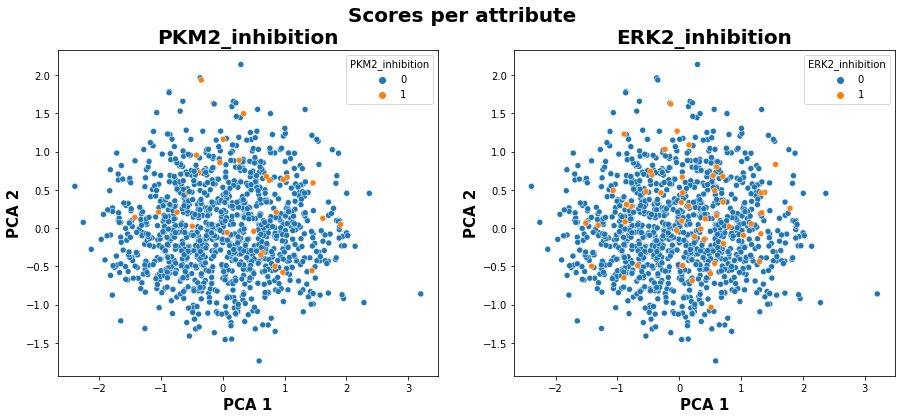

In [36]:
# plotting pca scores per attribute with PKM2 and ERK2 inhibition indicated:
fig, ax = plt.subplots(figsize= (15,6),nrows=1,ncols=2)
fig.suptitle("Scores per attribute", weight= 'bold', size= 20)

# PKM2:
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"],hue = df_data["PKM2_inhibition"], ax=ax[0])
ax[0].set_xlabel("PCA 1", weight = 'bold', size = 15)
ax[0].set_ylabel("PCA 2", weight = 'bold', size = 15)
ax[0].set_title("PKM2_inhibition", weight= 'bold', size= 20)

# ERK2:
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"],hue = df_data["ERK2_inhibition"], ax=ax[1])
ax[1].set_xlabel("PCA 1", weight = 'bold', size = 15)
ax[1].set_ylabel("PCA 2", weight = 'bold', size = 15)
ax[1].set_title("ERK2_inhibition", weight= 'bold', size= 20)

In [37]:

Kmeans = KMeans(5).fit(df_pca)
len(Kmeans.labels_)

1116